In [1]:
import csv
import gmaps
import numpy as np
import pandas as pd
import requests
from scipy import stats as st
from matplotlib import pyplot as plt
from datetime import datetime as dt


In [44]:
file1 = "Resources/ukemmission.csv"
file2 = "Resources/ukpopulation.csv"
emi_df = pd.read_csv(file1)
pop_df = pd.read_csv(file2)
pop_df.head()
pop_df.set_index("Year", inplace = True)
emi_df.set_index("Year", inplace = True)

In [45]:
# pop_df['Year'] = pop_df['Year'].dt.year
# pd.to_datetime(pop_df['Year'], format= '%Y')

# pop_df['Year'] = pop_df['Year'].dt.year



pop_df['key']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

pop_df= pop_df[['key', 'POPULATION/1000']]

pop_df



,key,POPULATION/1000
Year,,
1990,1,57237
1991,2,57439
1992,3,57585
1993,4,57714
1994,5,57862
1995,6,58025
1996,7,58164
1997,8,58314
1998,9,58475


In [46]:
emi_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year,,,,,,,,,,,,,,,,,,,,,
CO2,608.3,615.6,599.0,584.0,579.6,571.2,591.7,565.0,569.3,563.3,...,508.0,465.2,483.3,473.2,434.1,418.3,395.1,382.9,377.7,365.1
CH4,133.9,134.6,134.4,133.0,126.1,127.7,126.9,124.8,121.2,115.6,...,66.9,64.3,62.7,58.7,56.7,55.8,54.1,54.6,54.3,54.0
N2O,49.6,49.7,44.8,40.6,41.2,39.9,39.9,40.2,40.1,30.5,...,22.8,22.0,21.9,21.8,22.5,22.0,21.8,22.3,22.1,22.2
HFC,14.4,15.0,15.6,16.4,17.3,18.6,19.5,21.7,18.0,9.7,...,11.8,12.4,13.0,13.4,13.6,13.6,13.6,13.5,13.1,12.5
PFC,1.7,1.4,0.7,0.6,0.6,0.6,0.6,0.5,0.5,0.5,...,0.3,0.4,0.3,0.3,0.3,0.3,0.4,0.5,0.3,0.3
SF6,1.3,1.4,1.4,1.2,1.3,1.3,1.4,1.3,1.4,1.5,...,0.7,0.6,0.6,0.5,0.5,0.5,0.5,0.5,0.6,0.6
NF3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total-emissions,809.1,817.7,795.9,775.8,766.0,759.3,780.0,753.5,750.5,721.1,...,610.5,564.9,581.8,567.9,527.6,510.5,485.4,474.2,468.1,454.8


In [47]:
emis_df = emi_df.T

emis_df['key']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

emis_df = emis_df[['key','CO2','CH4','N2O','HFC','PFC','SF6','NF3','Total-emissions']]

emis_df.head()

Year,key,CO2,CH4,N2O,HFC,PFC,SF6,NF3,Total-emissions
1990,1,608.3,133.9,49.6,14.4,1.7,1.3,0.0,809.1
1991,2,615.6,134.6,49.7,15.0,1.4,1.4,0.0,817.7
1992,3,599.0,134.4,44.8,15.6,0.7,1.4,0.0,795.9
1993,4,584.0,133.0,40.6,16.4,0.6,1.2,0.0,775.8
1994,5,579.6,126.1,41.2,17.3,0.6,1.3,0.0,766.0


In [73]:
ukemi_df = pd.merge(emis_df,pop_df)
ukemi_df.head()


,key,CO2,CH4,N2O,HFC,PFC,SF6,NF3,Total-emissions,POPULATION/1000
0,1,608.3,133.9,49.6,14.4,1.7,1.3,0.0,809.1,57237
1,2,615.6,134.6,49.7,15.0,1.4,1.4,0.0,817.7,57439
2,3,599.0,134.4,44.8,15.6,0.7,1.4,0.0,795.9,57585
3,4,584.0,133.0,40.6,16.4,0.6,1.2,0.0,775.8,57714
4,5,579.6,126.1,41.2,17.3,0.6,1.3,0.0,766.0,57862


In [62]:
cor_df = ukemi_df[['POPULATION/1000','Total-emissions']]

cor_df = cor_df.rename(columns={'POPULATION/1000':'population','Total-emissions':'emissions'})
cor_df.head()

,population,emissions
0,57237,809.1
1,57439,817.7
2,57585,795.9
3,57714,775.8
4,57862,766.0


In [64]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = cor_df.population.values.reshape(-1, 1)
y = cor_df.emissions.values.reshape(-1, 1)

print('Shape: ',X.shape,y.shape)
# X

Shape:  (30, 1) (30, 1)


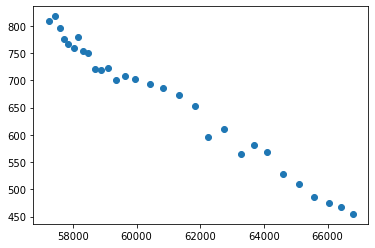

In [65]:
plt.scatter(X,y)

In [66]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression



model = LinearRegression()



In [67]:
# Fit the model to the data. 




model.fit(X, y)



LinearRegression()

In [68]:
# Print the coefficient and the intercept for the model


print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-0.03604112]]
y-axis intercept:  [2861.29931261]


In [69]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[57237]]
Max X Value: [[66797]]


In [70]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)


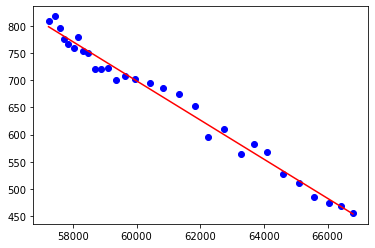

In [71]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]


plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
